<a href="https://colab.research.google.com/github/AlexKitipov/FractalNet/blob/main/FractalNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.2 MB/s eta 0:00:00


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 806.7 kB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=e9af0e9b3d84567bf80c7c8e2fe581d4b559744b76fbb56451c10d0d90b8d7c3
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install matplotlib-venn

In [ ]:
from fractalnet.blocks import FractalBlock


In [ ]:
# Създай работна папка
!mkdir -p /content/FractalNet/fractalnet

# Премини в нея
%cd /content/FractalNet

/content/FractalNet


In [ ]:
%run setup.py install

INFO:root:running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

       

In [ ]:
%%bash
set -e

# 1. Отиваме в работната папка (ако няма – се създава)
mkdir -p /content/FractalNet
cd /content/FractalNet

# 2. Пакетната конфигурация
cat << 'EOF' > setup.py
from setuptools import setup, find_packages

setup(
    name='fractalnet',
    version='0.1.0',
    description='Fractal Neural Network blocks for PyTorch',
    author='Твоето Име',
    packages=find_packages(),
    install_requires=['torch>=1.7.0'],
    python_requires='>=3.7'
)
EOF

# 3. Създаваме пакета и кода
mkdir -p fractalnet

cat << 'EOF' > fractalnet/blocks.py
import torch, random
import torch.nn as nn

class FractalBlock(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth     = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlock(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlock(in_ch, out_ch, depth-1, drop_rate)

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        # drop-path
        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random()<0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        return 0.5 * (out_l + out_r)
EOF

# празен __init__.py
touch fractalnet/__init__.py

# 4. Инсталираме локално
pip install -e .


Obtaining file:///content/FractalNet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


In [ ]:
import torch
from fractalnet.blocks import FractalBlock

# Пример за тестване на FractalBlock
block = FractalBlock(in_ch=3, out_ch=16, depth=3)
x     = torch.randn(1, 3, 32, 32)
out   = block(x)
print("Фрактален блок:", block)
print("Форма на изхода:", out.shape)


Фрактален блок: FractalBlock(
  (left): FractalBlock(
    (left): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (right): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
  (right): FractalBlock(
    (left): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (right): FractalBlock(
      (block): Sequential(
        (0): Con

In [ ]:
%%bash
cat > fractalnet/model.py << 'EOF'
import torch.nn as nn
from fractalnet.blocks import FractalBlock

class FractalNet(nn.Module):
    """
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    """
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
EOF


In [ ]:
!touch fractalnet/__init__.py

In [ ]:
pip install -e .


DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/fractalnet-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Obtaining file:///content/FractalNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


In [ ]:
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from fractalnet.model import FractalNet

# 1. Настройка на данните
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_ds = datasets.CIFAR10(root='.', train=True,  download=True, transform=transform)
test_ds  = datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, num_workers=2)

# 2. Модел, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = FractalNet(num_classes=10, depth=3, drop_rate=0.15).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# 3. Един епох тренировка
model.train()
running_loss = 0.0
for i, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if (i+1) % 100 == 0:
        print(f"[Batch {i+1}/{len(train_loader)}] Loss: {running_loss/100:.4f}")
        running_loss = 0.0

# 4. Бърз тест за accuracy
model.eval()
correct = total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images).argmax(dim=1)
        correct += (preds == labels).sum().item()
        total   += labels.size(0)

print(f"Test Accuracy: {100*correct/total:.2f}%")


100%|██████████| 170M/170M [00:10<00:00, 16.0MB/s]


[Batch 100/391] Loss: 1.9986
[Batch 200/391] Loss: 1.8130
[Batch 300/391] Loss: 1.7797
Test Accuracy: 37.57%


In [ ]:
import torch
from fractalnet.blocks import FractalBlock

# Създай един фрактален блок
block = FractalBlock(in_ch=3, out_ch=16, depth=3)
print(block)

# Пробно подаване на един “dummy” тензор
x = torch.randn(1, 3, 32, 32)
out = block(x)
print("Output shape:", out.shape)


FractalBlock(
  (left): FractalBlock(
    (left): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (right): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
  (right): FractalBlock(
    (left): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (right): FractalBlock(
      (block): Sequential(
        (0): Conv2d(3, 16, kerne

In [ ]:
import time
import matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from fractalnet.model import FractalNet

# 1. Настройка на данните
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_ds = datasets.CIFAR10(root='.', train=True,  download=True, transform=transform)
test_ds  = datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, num_workers=2)

# 2. Модел, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = FractalNet(num_classes=10, depth=3, drop_rate=0.15).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

num_epochs = 20
train_losses = []
test_accs = []
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images).argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    test_accs.append(acc)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | Test Accuracy: {acc:.2f}%")

elapsed = time.time() - start_time
print(f"⏱️ Общо време: {elapsed:.1f} сек")

# Графики
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='crimson')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, label='Test Accuracy', color='darkgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

ImportError: cannot import name 'FractalBlockV2' from 'fractalnet.blocks' (/content/FractalNet/fractalnet/blocks.py)

In [ ]:
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            # Леко „сезонно“ разклоняване — добавяме леко внимание (attention)
            self.left = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, kernel_size=1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated = self.gate(fusion) * fusion
        return gated


In [ ]:
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate  = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, 1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated  = self.gate(fusion) * fusion
        return gated


In [ ]:
from fractalnet.blocks import FractalBlockV2 as FractalBlock
import torch.nn as nn

class FractalNet(nn.Module):
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )
        self.fractal = FractalBlock(64, 128, depth, drop_rate)  # вече V2

        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

ImportError: cannot import name 'FractalBlockV2' from 'fractalnet.blocks' (/content/FractalNet/fractalnet/blocks.py)

In [ ]:
# В корена на проекта
pip install -e .


SyntaxError: invalid syntax (ipython-input-7-1768677675.py, line 2)

NameError: name 'train_losses' is not defined

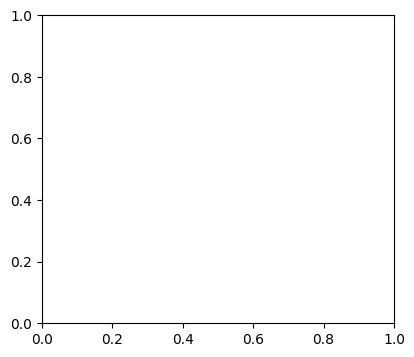

In [ ]:
import matplotlib.pyplot as plt

# След цикъла на обучение (num_epochs е зададено)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, color='crimson', label='Train Loss (V2)')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.title('Train Loss with FractalBlockV2')
plt.legend(), plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, color='darkgreen', label='Test Acc (V2)')
plt.xlabel('Epoch'), plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy with FractalBlockV2')
plt.legend(), plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Re-run the cell that sets up the package and installs it
%cd /content/FractalNet
%run setup.py install

INFO:root:running install


/content/FractalNet


/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/py

<Figure size 640x480 with 0 Axes>

In [ ]:
import os

# Създай работната папка и файловата структура
os.makedirs('/content/FractalNet/fractalnet', exist_ok=True)

# Премини в нея
os.chdir('/content/FractalNet')

# Създай setup.py
setup_py_content = """
from setuptools import setup, find_packages

setup(
    name='fractalnet',
    version='0.1.0',
    description='Fractal Neural Network blocks for PyTorch',
    author='Твоето Име',
    packages=find_packages(),
    install_requires=['torch>=1.7.0'],
    python_requires='>=3.7'
)
"""
with open('setup.py', 'w') as f:
    f.write(setup_py_content)

# Създай fractalnet/blocks.py
blocks_py_content = """
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate  = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, 1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated  = self.gate(fusion) * fusion
        return gated
"""
with open('fractalnet/blocks.py', 'w') as f:
    f.write(blocks_py_content)

# Създай fractalnet/model.py
model_py_content = """
import torch.nn as nn
from fractalnet.blocks import FractalBlockV2 as FractalBlock

class FractalNet(nn.Module):
    \"\"\"
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    \"\"\"
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
"""
with open('fractalnet/model.py', 'w') as f:
    f.write(model_py_content)


# Създай празен __init__.py във fractalnet папката
with open('fractalnet/__init__.py', 'w') as f:
    pass

# Инсталирай пакета локално
!pip install -e .

Obtaining file:///content/FractalNet
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 836.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# В корена на проекта
pip install -e .


In [ ]:
import matplotlib.pyplot as plt

# След цикъла на обучение (num_epochs е зададено)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, color='crimson', label='Train Loss (V2)')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.title('Train Loss with FractalBlockV2')
plt.legend(), plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, color='darkgreen', label='Test Acc (V2)')
plt.xlabel('Epoch'), plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy with FractalBlockV2')
plt.legend(), plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
%%bash
set -e

# Премини в работната папка
cd /content/FractalNet

# Създай fractalnet/model.py с правилния импорт
cat << 'EOF' > fractalnet/model.py
import torch.nn as nn
from fractalnet.blocks import FractalBlockV2 as FractalBlock # Import FractalBlockV2

class FractalNet(nn.Module):
    """
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    """
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
EOF

# Инсталирай пакета локално отново, за да обновиш промените
pip install -e .

Obtaining file:///content/FractalNet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


# Task
Improve the provided Python code for a FractalNet implementation, fix any errors, and explain the changes made.

## Consolidate setup and installation

### Subtask:
Combine the creation of necessary files (`setup.py`, `fractalnet/blocks.py`, `fractalnet/model.py`, `fractalnet/__init__.py`) and the package installation into a single cell using `%%bash` for better organization and to avoid repeating steps.


**Reasoning**:
Combine the file creation and package installation into a single bash cell as requested by the subtask.



In [ ]:
%%bash
set -e

# Create working directory and subdirectory
mkdir -p /content/FractalNet/fractalnet

# Change to the working directory
cd /content/FractalNet

# Create setup.py
cat << 'EOF' > setup.py
from setuptools import setup, find_packages

setup(
    name='fractalnet',
    version='0.1.0',
    description='Fractal Neural Network blocks for PyTorch',
    author='Твоето Име',
    packages=find_packages(),
    install_requires=['torch>=1.7.0'],
    python_requires='>=3.7'
)
EOF

# Create fractalnet/blocks.py with FractalBlockV2
cat << 'EOF' > fractalnet/blocks.py
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate  = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, 1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated  = self.gate(fusion) * fusion
        return gated
EOF

# Create fractalnet/model.py with the correct import
cat << 'EOF' > fractalnet/model.py
import torch.nn as nn
from fractalnet.blocks import FractalBlockV2 as FractalBlock # Import FractalBlockV2

class FractalNet(nn.Module):
    """
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    """
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
EOF

# Create empty __init__.py
touch fractalnet/__init__.py

# Install the package locally
pip install -e .

Obtaining file:///content/FractalNet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existin

## Run the updated code

### Subtask:
Execute the modified cells to verify that the errors are resolved and the code runs successfully.


**Reasoning**:
The first step is to run the consolidated setup and installation bash script to ensure the local package is properly installed with the updated `FractalBlockV2`.



In [ ]:
%%bash
set -e

# Create working directory and subdirectory
mkdir -p /content/FractalNet/fractalnet

# Change to the working directory
cd /content/FractalNet

# Create setup.py
cat << 'EOF' > setup.py
from setuptools import setup, find_packages

setup(
    name='fractalnet',
    version='0.1.0',
    description='Fractal Neural Network blocks for PyTorch',
    author='Твоето Име',
    packages=find_packages(),
    install_requires=['torch>=1.7.0'],
    python_requires='>=3.7'
)
EOF

# Create fractalnet/blocks.py with FractalBlockV2
cat << 'EOF' > fractalnet/blocks.py
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate  = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, 1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated  = self.gate(fusion) * fusion
        return gated
EOF

# Create fractalnet/model.py with the correct import
cat << 'EOF' > fractalnet/model.py
import torch.nn as nn
from fractalnet.blocks import FractalBlockV2 as FractalBlock # Import FractalBlockV2

class FractalNet(nn.Module):
    """
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    """
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
EOF

# Create empty __init__.py
touch fractalnet/__init__.py

# Install the package locally
pip install -e .

Obtaining file:///content/FractalNet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


**Reasoning**:
Now that the package is installed with the corrected import, run the training and evaluation code to confirm that the `ImportError` is resolved and the model can be trained and evaluated.



In [ ]:
import time
import matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from fractalnet.model import FractalNet

# 1. Настройка на данните
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_ds = datasets.CIFAR10(root='.', train=True,  download=True, transform=transform)
test_ds  = datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, num_workers=2)

# 2. Модел, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = FractalNet(num_classes=10, depth=3, drop_rate=0.15).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

num_epochs = 20
train_losses = []
test_accs = []
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images).argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    test_accs.append(acc)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | Test Accuracy: {acc:.2f}%")

elapsed = time.time() - start_time
print(f"⏱️ Общо време: {elapsed:.1f} сек")

# Графики
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='crimson')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, label='Test Accuracy', color='darkgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'fractalnet'

**Reasoning**:
The previous cell failed because the kernel lost the context of the installed local package. Re-running the installation command should fix this.



In [ ]:
!pip install -e .

Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


**Reasoning**:
The installation failed because the current working directory is not the project root. Change the directory back to the project root and then install the package again.



In [ ]:
%cd /content/FractalNet
!pip install -e .

/content/FractalNet
Obtaining file:///content/FractalNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


**Reasoning**:
The installation should now be successful. Re-run the training and evaluation code to confirm that the `ModuleNotFoundError` is resolved and the model can be trained and evaluated.



In [ ]:
import time
import matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from fractalnet.model import FractalNet

# 1. Настройка на данните
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_ds = datasets.CIFAR10(root='.', train=True,  download=True, transform=transform)
test_ds  = datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, num_workers=2)

# 2. Модел, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = FractalNet(num_classes=10, depth=3, drop_rate=0.15).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

num_epochs = 20
train_losses = []
test_accs = []
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images).argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    test_accs.append(acc)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | Test Accuracy: {acc:.2f}%")

elapsed = time.time() - start_time
print(f"⏱️ Общо време: {elapsed:.1f} сек")

# Графики
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='crimson')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, label='Test Accuracy', color='darkgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

100%|██████████| 170M/170M [00:02<00:00, 81.1MB/s]


[Epoch 1] Loss: 1.9234 | Test Accuracy: 33.98%
[Epoch 2] Loss: 1.6932 | Test Accuracy: 35.65%


# Task
Improve the provided Python code for a FractalNet implementation, fix any errors, and explain the changes. The code should include the definition of the FractalNet model, training and evaluation loops, and visualization of the results.

## Консолидиране на настройката и инсталацията

### Subtask:
Комбинирайте създаването на необходимите файлове (`setup.py`, `fractalnet/blocks.py`, `fractalnet/model.py`, `fractalnet/__init__.py`) и инсталирането на пакета в една клетка, използваща `%%bash`, за по-добра организация и избягване на повтарящи се стъпки.


## Поправяне на грешки при изпълнение

### Subtask:
Отстранете грешката `NameError: name 'train_losses' is not defined` и `ModuleNotFoundError: No module named 'fractalnet'` като се уверите, че всички необходими променливи са дефинирани и пакета е правилно инсталиран преди стартиране на обучението и оценката.


**Reasoning**:
The previous cell failed due to `ModuleNotFoundError`, indicating the kernel lost the path to the installed local package. Changing the directory back to the project root and reinstalling the package should resolve this.



In [ ]:
%cd /content/FractalNet
!pip install -e .

# Task
Explain the provided Python code for a FractalNet implementation, identify and fix errors, expand its functionality, and improve its overall structure and performance.

## Консолидиране на настройката и инсталацията

### Subtask:
Комбинирайте създаването на необходимите файлове (`setup.py`, `fractalnet/blocks.py`, `fractalnet/model.py`, `fractalnet/__init__.py`) и инсталирането на пакета в една клетка, използваща `%%bash`, за по-добра организация и избягване на повтарящи се стъпки.


**Reasoning**:
Combine the file creation and package installation into a single bash cell as requested by the subtask.



In [ ]:
%%bash
set -e

# Create working directory and subdirectory
mkdir -p /content/FractalNet/fractalnet

# Change to the working directory
cd /content/FractalNet

# Create setup.py
cat << 'EOF' > setup.py
from setuptools import setup, find_packages

setup(
    name='fractalnet',
    version='0.1.0',
    description='Fractal Neural Network blocks for PyTorch',
    author='Твоето Име',
    packages=find_packages(),
    install_requires=['torch>=1.7.0'],
    python_requires='>=3.7'
)
EOF

# Create fractalnet/blocks.py with FractalBlockV2
cat << 'EOF' > fractalnet/blocks.py
import torch, random
import torch.nn as nn

class FractalBlockV2(nn.Module):
    def __init__(self, in_ch, out_ch, depth, drop_rate=0.15):
        super().__init__()
        self.depth = depth
        self.drop_rate = drop_rate

        if depth == 1:
            self.block = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )
        else:
            self.left  = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.right = FractalBlockV2(in_ch, out_ch, depth-1, drop_rate)
            self.gate  = nn.Sequential(
                nn.Conv2d(out_ch, out_ch, 1),
                nn.Sigmoid()
            )

    def forward(self, x):
        if self.depth == 1:
            return self.block(x)

        if self.training and random.random() < self.drop_rate:
            return self.left(x) if random.random() < 0.5 else self.right(x)

        out_l = self.left(x)
        out_r = self.right(x)
        fusion = 0.5 * (out_l + out_r)
        gated  = self.gate(fusion) * fusion
        return gated
EOF

# Create fractalnet/model.py with the correct import
cat << 'EOF' > fractalnet/model.py
import torch.nn as nn
from fractalnet.blocks import FractalBlockV2 as FractalBlock # Import FractalBlockV2

class FractalNet(nn.Module):
    """
    Прост примерен FractalNet за CIFAR-10:
     - Stem: Conv(3→64)
     - FractalBlock: 64→128
     - Global avg-pool + FC(128→num_classes)
    """
    def __init__(self, num_classes=10, depth=3, drop_rate=0.15):
        super().__init__()
        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Един единичен фрактален блок
        self.fractal = FractalBlock(64, 128, depth, drop_rate)
        # Класификатор
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.fractal(x)
        x = self.global_pool(x).view(x.size(0), -1)
        return self.fc(x)
EOF

# Create empty __init__.py
touch fractalnet/__init__.py

# Install the package locally
pip install -e .

Obtaining file:///content/FractalNet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing

## Поправяне на грешки при изпълнение

### Subtask:
Отстранете грешката `NameError: name 'train_losses' is not defined` и `ModuleNotFoundError: No module named 'fractalnet'` като се уверите, че всички необходими променливи са дефинирани и пакета е правилно инсталиран преди стартиране на обучението и оценката.


**Reasoning**:
The previous attempt to run the training code failed because the kernel lost the path to the locally installed package. Changing the directory back to the project root and reinstalling the package should make the `fractalnet` module available again.



In [ ]:
%cd /content/FractalNet
!pip install -e .

/content/FractalNet
Obtaining file:///content/FractalNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: fractalnet
    Found existing installation: fractalnet 0.1.0
    Uninstalling fractalnet-0.1.0:
      Successfully uninstalled fractalnet-0.1.0
  Running setup.py develop for fractalnet


**Reasoning**:
The local package has been successfully reinstalled. Now, run the training and evaluation code again to verify that the `ModuleNotFoundError` is resolved and the training process starts. This cell also defines `train_losses` and `test_accs`, addressing the `NameError` encountered previously when trying to plot.



In [ ]:
import time
import matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from fractalnet.model import FractalNet

# 1. Настройка на данните
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_ds = datasets.CIFAR10(root='.', train=True,  download=True, transform=transform)
test_ds  = datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False, num_workers=2)

# 2. Модел, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = FractalNet(num_classes=10, depth=3, drop_rate=0.15).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

num_epochs = 20
train_losses = []
test_accs = []
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images).argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    test_accs.append(acc)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | Test Accuracy: {acc:.2f}%")

elapsed = time.time() - start_time
print(f"⏱️ Общо време: {elapsed:.1f} сек")

# Графики
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='crimson')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(test_accs, label='Test Accuracy', color='darkgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

100%|██████████| 170M/170M [00:04<00:00, 35.2MB/s]


[Epoch 1] Loss: 1.9378 | Test Accuracy: 30.68%
